# Arbeitsblatt 3: Supportvektormaschinen mit Scikit Learn, Random Forests und Boosting

## 1. Klassifikation mit SVMs

In unserer letzten Übung befassen wir uns mit dem Python-Paket *Scikit Learn*, mit dem sich die meisten Standard-Lernmaschinen auf sehr bequeme (und trotzdem performante) Weise realisieren lassen. Schauen Sie sich zunächst das einführende Tutorium unter `http://scikit-learn.org/stable/tutorial/basic/tutorial.html` an, um die grundsätzliche Syntax zu erlernen.

Aufgaben:


a) Laden Sie, wie im Tutorium beschrieben, den berühmten MNIST-Datensatz mit eingescannten handgeschriebenen Ziffern mit der Funktion `digits = load_digits()`. Grundlegende Informationen zum Datensatz erhalten Sie durch Ausgabe des Attributes `digits.DESCR`. Die Merkmalsvektoren (hier Bilder) sind die Zeilen der Designmatrix `digits.data`, die zugehörigen Labels stehen in dem Vektor `digits.target`. Wie in Arbeitsblatt 1 gelernt, finden Sie heraus, wieviele und welche Labels und wieviele Daten es gibt, und welche Dimension diese haben. Stellen Sie eine Zufallsauswahl von 10 Bildern (zusammen mit der Klassenzugehörigkeit) in Ihrem Notebook dar.

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
Description of the dataset:  .. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a pre

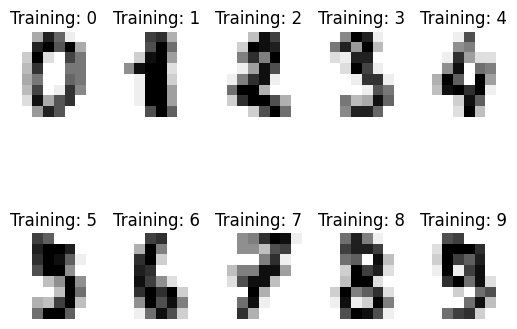

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
823,0.0,0.0,5.0,14.0,12.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,13.0,16.0,8.0,0.0,0.0,1
146,0.0,0.0,0.0,6.0,14.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,15.0,14.0,6.0,0.0,6
1028,0.0,0.0,8.0,16.0,15.0,6.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,8.0,15.0,16.0,14.0,1.0,0.0,8
67,0.0,0.0,5.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,14.0,16.0,12.0,7.0,0.0,6
158,0.0,0.0,2.0,13.0,13.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,15.0,13.0,1.0,0.0,0.0,8
1006,0.0,1.0,12.0,16.0,10.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,12.0,16.0,16.0,16.0,8.0,0.0,9
1729,0.0,0.0,4.0,12.0,13.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,16.0,14.0,8.0,0.0,0.0,3
1585,0.0,0.0,0.0,13.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,15.0,0.0,0.0,0.0,1
62,0.0,0.0,14.0,16.0,14.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,13.0,16.0,16.0,10.0,1.0,0.0,3
1558,0.0,0.0,3.0,11.0,13.0,15.0,3.0,0.0,0.0,4.0,...,0.0,0.0,0.0,2.0,12.0,14.0,3.0,0.0,0.0,3


In [2]:



import os 
os.getcwd() 
import sys
sys.path.append("C:/Users/Chris/AppData/Local/Packages/PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0/LocalCache/local-packages/Python310/site-packages")
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import svm
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


iris = datasets.load_iris()
digits_handwritten = datasets.load_digits()

print(digits_handwritten.data)

# give description of the dataset
print("Description of the dataset: ", digits_handwritten.DESCR)
# print the target values
print("Target values: ", digits_handwritten.target)

 # show basic information about the dataset
print("Shape of the data: ", digits_handwritten.data.shape)
print("Number of samples: ", len(digits_handwritten.data))
print("Number of features: ", len(digits_handwritten.data[0]))
print("Number of classes: ", len(digits_handwritten.target_names))

 # show 10 random samples of the datase
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits_handwritten.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
    plt.title('Training: %i' % digits_handwritten.target[i])
plt.show()

# add the target values to the dataset
digits_handwritten_df = pd.DataFrame(digits_handwritten.data)
digits_handwritten_df_withTargets = pd.DataFrame(digits_handwritten.data)
digits_handwritten_df_withTargets['target'] = digits_handwritten.target

# show the first 5 rows of the dataset
digits_handwritten_df_withTargets.head()

# data frame describing the dataset
digits_handwritten_df_withTargets.describe()

digits_handwritten_df_withTargets.sample(10)


b) Teilen Sie den Datensatz zufällig in einen nichtüberlappenden Trainings- und Testdatensatz auf, so dass ein Viertel der Daten zu Testdaten werden. Dies geschieht am Einfachsten mit der Funktion `sklearn.model_selection.train_test_split()`. Trainieren Sie einen Supportvektor-Klassifikator (Standard in *Scikit Learn* ist eine 1-Norm Soft Margin SVM, bei Mehrklassenproblemen wird automatisch ein Satz von one-vs.-one-Klassifikatoren erstellt) mit einem RBF-Kern mit $\gamma = 0.015$ und einem Parameter $C = 1.0$. Bestimmen Sie den Anteil korrekt klassifizierter Beispiele (Korrektklassifikationsrate, **Treffergenauigkeit**, engl. *Accuracy*) im Trainings- und Testdatensatz mithilfe der Funktion `SVC.score()`.


In [3]:

# split the dataset randomly into training and test data (75% training, 25% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits_handwritten.data, digits_handwritten.target, test_size=0.25, random_state=0)

# show the shape of the training and test data
print("Shape of the training data: ", X_train.shape)
print("Shape of the test data: ", X_test.shape)

# create a classifier
classifier = svm.SVC(gamma=0.015, C=1.0)
 
# train the classifier
classifier.fit(X_train, y_train)
# predict the target values for the test data
y_pred = classifier.predict(X_test)
# show score
print("Score: ", classifier.score(X_test, y_test))
 

Shape of the training data:  (1347, 64)
Shape of the test data:  (450, 64)


SVC(gamma=0.015)

Score:  0.5155555555555555


 **Underfitting** liegt vor, wenn Ihr Klassifikator auf den Trainingsdatensatz eine Treffergenauigkeit von deutlich unter 100% erzielt, bei **Overfitting** liegt die Treffergenauigkeit auf dem Testdatensatz deutlich unter der auf dem Trainingsdatensatz. Welcher Fall liegt hier vor? \
 Da der Score deutlich unter 100% liegt, liegt Underfitting vor.
 

Probieren Sie alternativ die SVM-Parameter $\gamma = 0.001$ und $C = 100$ und vergleichen Sie. Wiederholen Sie das Experiment für einen anderen Zufallssplit in Trainings- und Testdatensatz. Wie stark hängt Ihr Ergebnis von der zufälligen Teilung in Trainings- und Testdatensatz ab?

In [9]:
# repeat the training with different parameters gamma  = 0.001, C = 100
classifier = svm.SVC(gamma=0.001, C=100.0)
classifier.fit(X_train, y_train)
print("Score with gamma  = 0.001, C = 100 : ", classifier.score(X_test, y_test))
 
# make random splits of the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(digits_handwritten.data, digits_handwritten.target, test_size=0.25, random_state=52)

# create a classifier
classifier_new = svm.SVC(gamma=0.001, C=100)

# train the classifier
classifier_new.fit(X_train, y_train)
 
# show score
print("Score with same classifier but diffrent split: ", classifier_new.score(X_test, y_test))

 

SVC(C=100.0, gamma=0.001)

Score with gamma  = 0.001, C = 100 :  0.9933333333333333


SVC(C=100, gamma=0.001)

Score with same classifier but diffrent split:  0.9933333333333333


Der wert ist nahe an 1 und schwankt nur minimal. Das bedeutet, dass die Treffergenauigkeit nicht stark von der zufälligen Teilung abhängt.


## 2. Kreuzvalidierung und Modellselektion

Bei der Methode der Kreuzvalidierung wird der zufällige Split in Trainings- und Testdatensatz aus Aufgabe 1 mehrere Male wiederholt und der Durchschnitt über mehrere Splits berechnet, um eine genauere Schätzung der wirklichen Treffergenauigkeit zu erhalten. *Scikit Learn* stellt dafür bereits eine vordefinierte Methode zur Verfügung: `sklearn.model_selection`. Die Methode verwendet die Iteratorsyntax von Python, Beispiele zur Verwendung finden Sie in der Dokumentation dieser Methode. `ShuffleSplit()` erzeugt einen Satz von permutierten Indizes von Trainings- und Testdaten.

Aufgaben:

a) Erzeugen Sie zunächst 3 Sätze und trainieren Sie für jeden Satz eine SVM mit $\gamma = 0.001$ und $C = 1$ und geben Sie jeweils die Treffergenauigkeit für Trainings- und Testdatensatz aus. Die Ergebnisse sollten ähnlich wie in Aufgabe 1b aussehen.

In [10]:
# generate 3 random splits of the data into training and test data
x_train1, x_test1, y_train1, y_test1 = train_test_split(digits_handwritten.data, digits_handwritten.target, test_size=0.25, random_state=0)
x_train2, x_test2, y_train2, y_test2 = train_test_split(digits_handwritten.data, digits_handwritten.target, test_size=0.25, random_state=50)
x_train3, x_test3, y_train3, y_test3 = train_test_split(digits_handwritten.data, digits_handwritten.target, test_size=0.25, random_state=100)

# create a classifier with gamma = 0.001, C = 1
classifier1 = svm.SVC(gamma=0.001, C=1)
classifier2 = svm.SVC(gamma=0.001, C=1)
classifier3 = svm.SVC(gamma=0.001, C=1)

# train the classifier
classifier1.fit(x_train1, y_train1)
classifier2.fit(x_train2, y_train2)
classifier3.fit(x_train3, y_train3)

# show score
print("Score with gamma = 0.001, C = 1, split 1: ", classifier1.score(x_test1, y_test1))
print("Score with gamma = 0.001, C = 1, split 2: ", classifier2.score(x_test2, y_test2))
print("Score with gamma = 0.001, C = 1, split 3: ", classifier3.score(x_test3, y_test3))
 

 
 

SVC(C=1, gamma=0.001)

SVC(C=1, gamma=0.001)

SVC(C=1, gamma=0.001)

Score with gamma = 0.001, C = 1, split 1:  0.9955555555555555
Score with gamma = 0.001, C = 1, split 2:  0.9844444444444445
Score with gamma = 0.001, C = 1, split 3:  0.9933333333333333


b) Statt wie in 2a von Hand vorzugehen gibt es in *Scikit Learn* die bereits vordefinierte Methode `sklearn.model_selection.cross_val_score()`. Wiederholen Sie Ihr Experiment aus Aufgabe 2a mit 10 Zufallssplits und geben Sie jeweils die Treffergenauigkeit auf dem Testdatensatz aus. Berechnen Sie die mittlere Treffergenauigkeit (die **Kreuzvalidierungsgenauigkeit**) und die Standardabweichung des Mittelwerts.

Mean score:  0.9810738671632526
Standard deviation:  0.01557918414805507
All scores:  [0.96666667 1.         0.95       0.98333333 0.99444444 0.98888889
 0.99444444 0.99441341 0.97206704 0.96648045]


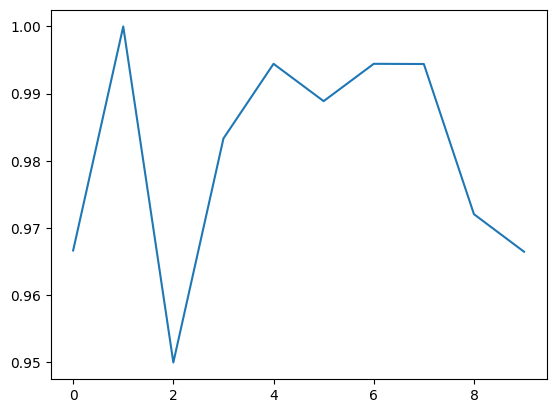

In [14]:
# 10 random samples of the dataset with cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, digits_handwritten.data, digits_handwritten.target, cv=10)
# show mean score
print("Mean score: ", scores.mean())
# show standard deviation
print("Standard deviation: ", scores.std())
# show all scores
print("All scores: ", scores)

# shwo scores in a plot
plt.plot(scores)
plt.show()
 



c) Mithilfe der Kreuzvalidierungsgenauigkeit können die optimalen $\gamma$- und $C$-Parameter der SVM automatisch gefunden werden. Dieser Vorgang heißt Modellselektion. Man führt zu diesem Zweck eine Gittersuche durch: zunächst wird ein Satz von Werten für $\gamma$ und $C$ festgelegt. Für alle Wertepaare wird die Kreuzvalidierungsgenauigkeit bestimmt und dann
die Parameter gewählt, die die höchste Treffergenauigkeit erzielen. Finden Sie auf diese Weise für $C = 10$ den besten Gammawert aus einem Satz von 10 logarithmisch skalierten Gammawerten, erzeugt mit

Verwenden Sie dazu eine Trainings- und Testdatensatzgröße von 500 und 5 Splits (s. Dokumentation von `ShuffleSplit`) und speichern Sie die Treffergenauigkeit auf dem Trainings- und Testdatensatz für jeden Gammawert und Split. Plotten Sie die Treffergenauigkeitskurve für jeden Split mit dem Gammawert als Abszisse in einem gemeinsamen Diagramm, jeweils für die Trainings- und die Testdaten. Diese Kurven werden **Validierungskurven** genannt
(s.u.). Für welche Gammawerte erhalten Sie Underfitting, für welche Overfitting? Wo liegt der optimale Gammawert?

<img src="validierungskurve.png" alt="drawing" width="100"/>

SVC(C=10, gamma=1e-07)

Score for gamma = 0.000000: 0.106667
Mean score: 0.108902
Standard deviation: 0.033854
Scores:  [0.09792285 0.17507418 0.10237389 0.08605341 0.08308605]


SVC(C=10, gamma=4.641588833612782e-07)

Score for gamma = 0.000000: 0.106667
Mean score: 0.189021
Standard deviation: 0.057222
Scores:  [0.11721068 0.27448071 0.1810089  0.14243323 0.22997033]


SVC(C=10, gamma=2.1544346900318822e-06)

Score for gamma = 0.000002: 0.871111
Mean score: 0.902077
Standard deviation: 0.010658
Scores:  [0.88278932 0.90504451 0.90207715 0.90504451 0.91543027]


SVC(C=10, gamma=1e-05)

Score for gamma = 0.000010: 0.937778
Mean score: 0.955786
Standard deviation: 0.006727
Scores:  [0.96290801 0.95845697 0.94510386 0.95103858 0.96142433]


SVC(C=10, gamma=4.641588833612772e-05)

Score for gamma = 0.000046: 0.960000
Mean score: 0.975964
Standard deviation: 0.001968
Scores:  [0.97626113 0.97626113 0.97477745 0.97922849 0.97329377]


SVC(C=10, gamma=0.00021544346900318823)

Score for gamma = 0.000215: 0.973333
Mean score: 0.984866
Standard deviation: 0.001454
Scores:  [0.9851632  0.9851632  0.98219585 0.98664688 0.9851632 ]


SVC(C=10, gamma=0.001)

Score for gamma = 0.001000: 0.986667
Mean score: 0.985757
Standard deviation: 0.001780
Scores:  [0.98664688 0.98367953 0.98367953 0.98664688 0.98813056]


SVC(C=10, gamma=0.004641588833612773)

Score for gamma = 0.004642: 0.893333
Mean score: 0.955786
Standard deviation: 0.006460
Scores:  [0.9495549  0.95697329 0.95845697 0.94807122 0.96587537]


SVC(C=10, gamma=0.021544346900318822)

Score for gamma = 0.021544: 0.122222
Mean score: 0.151335
Standard deviation: 0.024827
Scores:  [0.15578635 0.19139466 0.15281899 0.14243323 0.11424332]


SVC(C=10, gamma=0.1)

Score for gamma = 0.100000: 0.106667
Mean score: 0.094659
Standard deviation: 0.008414
Scores:  [0.09940653 0.10089021 0.10385757 0.08605341 0.08308605]
Best gamma value:  [0.001, 0.9857566765578636]


Text(0.5, 1.0, 'Validation Curve with SVM')

Text(0.5, 0, '$\\gamma$')

Text(0, 0.5, 'Score')

(0.0, 1.1)

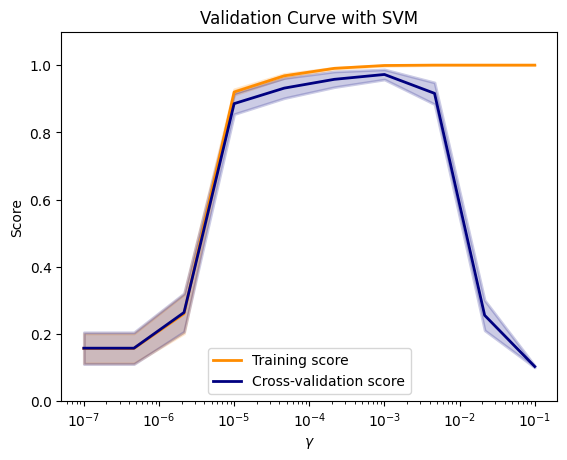

In [11]:
gammas = np.logspace(-7, -1, 10)
C = 10
scores_gamma = list() 

# use training data of size 500 and 5 splits (ShuffleSplit) for cross validation
from sklearn.model_selection import ShuffleSplit, cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
# show cv 

 
 
 # find the best gamma value with cross validation (5 splits) and training data of size 500
for gamma in gammas:
    classifier = svm.SVC(gamma=gamma, C=C)
    classifier.fit(X_train[:500], y_train[:500])
    print("Score for gamma = %.6f: %f" % (gamma, classifier.score(X_test, y_test)))
    # save the score for each gamma value
    scores = cross_val_score(classifier, X_train, y_train, cv=cv)
    print("Mean score: %f" % scores.mean())
    print("Standard deviation: %f" % scores.std()) 
    # show the score for each split
    print("Scores: ", scores)
    # save score for each gamma value in a array with corresponding gamma value
    scores_gamma.append([gamma, scores.mean()])
    
# print the best gamma value
print("Best gamma value: ", max(scores_gamma, key=lambda item:item[1]))

from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(svm.SVC(), digits_handwritten.data, digits_handwritten.target, param_name="gamma", param_range=gammas, cv=5,scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(gammas, train_scores_mean, label="Training score", color="darkorange", lw=lw)
plt.fill_between(gammas, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2,color="darkorange", lw=lw)
plt.semilogx(gammas, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
plt.fill_between(gammas, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)

plt.legend(loc="best")
plt.show()

Text(0.5, 0, 'gamma')

Text(0, 0.5, 'score')

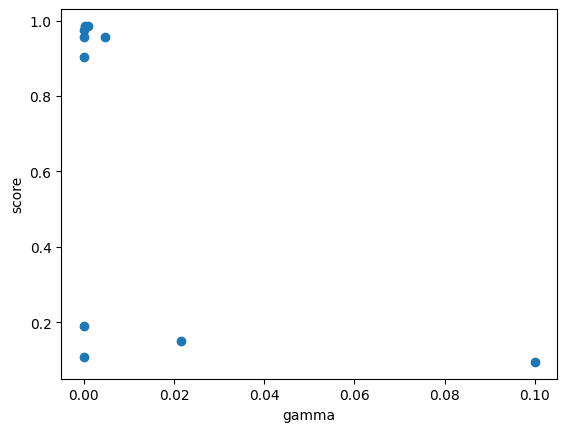

In [13]:

# show the scores_gamma in plot with gamma values on x-axis and score on y-axis
scores_gamma = np.array(scores_gamma)
plt.plot(scores_gamma[:, 0], scores_gamma[:, 1], 'o')
plt.xlabel('gamma')
plt.ylabel('score')
plt.show()
 


d) Die Gittersuche lässt sich ebenfalls automatisieren mit `sklearn.model_selection. GridSearchCV()`. Wir erzeugen dazu ein Gitter aus Wertepaaren für $\gamma$ und $C$ mit dem Dictionary

In [21]:
svc_params = {
    'C': np.logspace(-1, 2, 4),
    'gamma': np.logspace(-4, 0, 5), 
}
# shrink the dataset to 500 samples
X_train_small = X_train[:500]
y_train_small = y_train[:500]

# do a grid search with cross validation and shrinked dataset
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(svm.SVC(), svc_params, cv=3, verbose=1)
grid_search.fit(X_train_small, y_train_small)
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# test the best estimator with the test data
print("Score on test data: ", grid_search.best_estimator_.score(X_test, y_test))


Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': array([  0.1,   1. ,  10. , 100. ]),
                         'gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])},
             verbose=1)

Best parameters:  {'C': 10.0, 'gamma': 0.001}
Best score:  0.9759998076136883
Score on test data:  0.9866666666666667


Dieses Gitter kann direkt an `GridSearchCV()` als Argument `param_grid` übergeben werden. Da diese Prozedur sehr zeitaufwendig ist, verkleinern wie den Datensatz auf die ersten 500 Beispiele. Führen Sie für diesen verkleinerten Datensatz eine Gittersuche mithilfe von `GridSearchCV()` und jeweils 3 Splits (Parameter `cv`) durch. Den besten Parametersatz erhalten Sie mit `GridSearchCV().best_params_`, die höchste Treffergenauigkeit mit `GridSearchCV().best_score_`. Ausführliche Informationen zu jedem Parameterwertepaar stehen in dem Dictionary `GridSearchCV().cv_results_`. Nach der Gittersuche führt `GridSearchCV()` noch ein Training auf dem gesamten Datensatz mit den besten Parametern durch, so dass die resultierende Maschine sofort eingesetzt werden kann. Testen Sie diese Maschine auf den übriggebliebenen Daten.


## 3. Klassifikation mit Random Forests und Boosting

a) Wiederholen Sie Aufgabe 1 b mit einem Random Forest. Teilen Sie dazu den Datensatz wieder in einen Trainings- und Testdatensatz. Bestimmen Sie den Fehler auf den Testdaten und vergleichen Sie ihn mit dem ”out of bag”-Fehler.

In [35]:


# split the dataset randomly into training and test data (75% training, 25% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits_handwritten.data, digits_handwritten.target, test_size=0.25, random_state=0)

# Do a random forest classification with 100 trees with oob error
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=500, oob_score=True)
classifier.fit(X_train, y_train)
print("Score: ", classifier.score(X_test, y_test))

# show error rate for each digit of the test data
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Error rate for each digit: ", 1 - np.diag(cm) / np.sum(cm, axis=1))

# calculate out of bag error
print("Out of bag error: ", 1 - classifier.oob_score_)
 
 

RandomForestClassifier(n_estimators=500, oob_score=True)

Score:  0.9755555555555555
Error rate for each digit:  [0.         0.02325581 0.04545455 0.02222222 0.02631579 0.04166667
 0.         0.         0.04166667 0.04255319]
Out of bag error:  0.024498886414253906


b) Wiederholen sie Aufgabe 1 b mit einem Boosting-Verfahren. Sie können dazu entweder die Implementierung von *sklearn* verwenden oder Sie installieren *xgboost* (`https://github.com/dmlc/xgboost`) oder *catboost* (`https://catboost.ai/docs/`).

In [26]:
# repeat classification with catboost
from catboost import CatBoostClassifier
classifier = CatBoostClassifier(iterations=100, random_seed=0, logging_level='Silent')
classifier.fit(X_train, y_train)
print("Score: ", classifier.score(X_test, y_test))


Score:  0.9777777777777777
